#### Initialization 
Import libraries and set variables. This code cell must run first. All the code cells below depend on this code cell. The implementation details are inside GEOS2115.py which locates in the same directory with this Jupyter Notebook file.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

import GEOS2115_cfg
#do not change the following commented-out lines unless you know what you are doing.
GEOS2115_cfg.ATOM_HOME = '../'
GEOS2115_cfg.ATM_CFG_FILE_NAME = './config_atm.xml'
GEOS2115_cfg.HYD_CFG_FILE_NAME = './config_hyd.xml'
GEOS2115_cfg.OUTPUT_DIR = './output/' #the location of atom output files

from GEOS2115 import *

#set start time, end time and time step 
start_time = 0
end_time = 1
time_step = 5

print('The time steps are ' + str(range(start_time, end_time+1, time_step)))


#### Topography Maps
This code cell draws the topography maps for each time steps. 

In [ ]:
print(str(len(range(start_time, end_time+1, time_step))) + ' paleotopography maps will be drawn below.')
print('The time steps are ' + str(range(start_time, end_time+1, time_step)))

for time in range(start_time, end_time+1, time_step):
    draw_topography_map(time)
    

#### Run ATOM Model
This code cell runs the ATOM model for each time steps. The output will be saved on hard drive and the following code cells need the output files to visualize and analyse the results. This code cell will take a while to finish, be patient ...

In [ ]:
print('The time steps are ' + str(range(start_time, end_time+1, time_step)))

run_model(start_time, end_time, time_step, ap=2)


#### Temperature Maps
This code cell will draw the present day temperature map from NASA first and then draw the temperature map at a given time. The time must be one of the time steps.

In [ ]:
#choose air temperature or ocean temperature
air_or_ocean = 'air' 
#air_or_ocean = 'ocean'

time = 0 #The time must be one of the time steps.

if time not in range(start_time, end_time+1, time_step):
    print('The time steps are ' + str(range(start_time, end_time+1, time_step)))
    sys.exit("The time must be one of the time steps.")
    
draw_NASA_present_day_temperature_map()

draw_temperature_map(time, air_or_ocean)


#### Precipitation Maps
This code cell will draw the present day precipitation map from NASA first and then draw the precipitation map at a given time. The time must be one of the time steps.

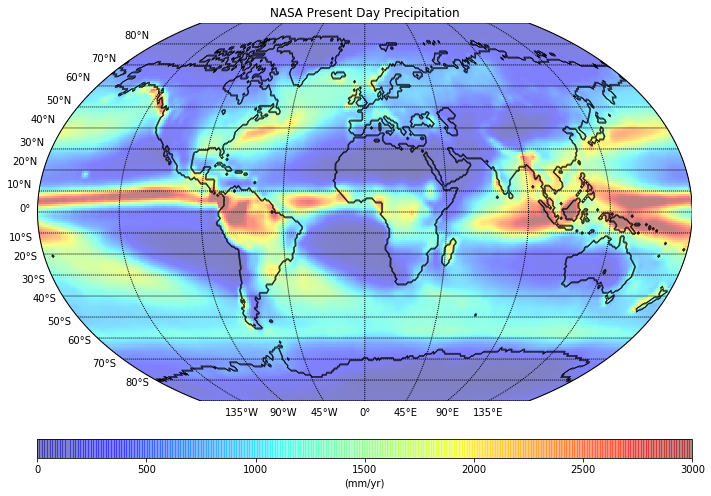

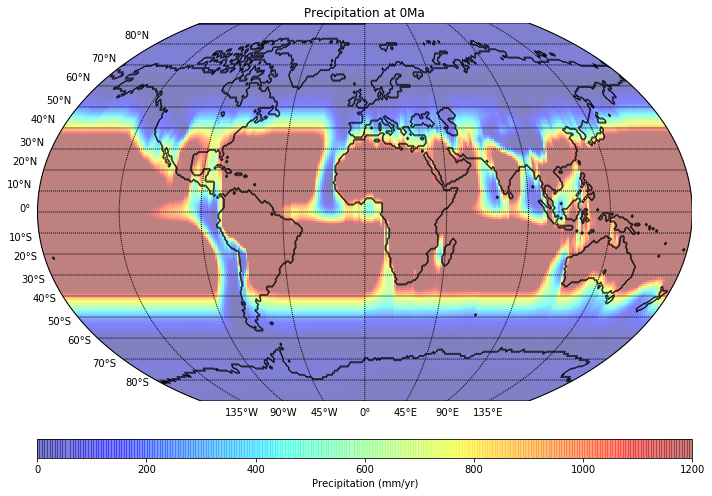

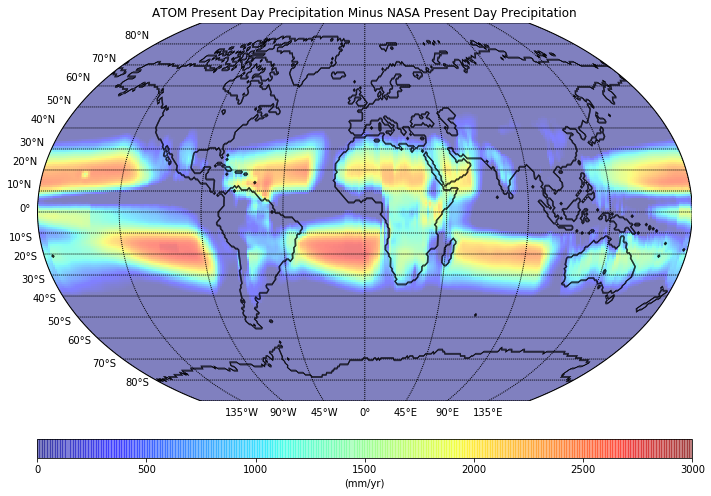

In [6]:
time = 0 #The time must be one of the time steps.

if time not in range(start_time, end_time+1, time_step):
    print('The time steps are ' + str(range(start_time, end_time+1, time_step)))
    sys.exit("The time must be one of the time steps.")

draw_NASA_present_day_precipitation_map()

draw_precipitation_map(time)

data = np.genfromtxt(OUTPUT_DIR + '[{0}Ma_smooth.xyz]_PlotData_Atm.xyz'.format(time), skip_header=1)
z = data[:,8]
zz=z*365 #365 days in one year

data = np.genfromtxt(ATOM_HOME + 'data/SurfacePrecipitation_NASA.xyz')
topo_data = np.genfromtxt(ATOM_HOME + 'data/topo_grids/0Ma_smooth.xyz')

x = data[:,0]
y = data[:,1]
z = data[:,2] * 365 
z = zz - z 
xt = topo_data[:,0]
yt = topo_data[:,1]
topo = topo_data[:,2]
topo = np.where(topo>0,1, 0)

fig = plt.figure(figsize=(15, 8))
m = Basemap(llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,projection='kav7', lon_0=0)

x, z = m.shiftdata(x, datain = z, lon_0=0)

xi, yi = m(x, y)
xit, yit = m(xt, yt)

zz = np.zeros((181, 361))
for i in range(181):
    for j in range(361):
        zz[180-i][j] = z[j*181+i]
img_data = m.transform_scalar(zz, np.arange(-180,180),np.arange(-90,90),361,181)
cs = m.imshow(img_data,alpha=0.5, clim=[0,3000], cmap='jet')

m.contour( xit.reshape((181,361)), yit.reshape((181,361)), topo.reshape((181,361)),
                colors ='k', linewidths= 0.3 )
m.drawparallels(np.arange(-90., 90., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 180., 45.), labels=[0,0,0,1], fontsize=10)

cbar = m.colorbar(cs, location='bottom', pad="10%", label='(mm/yr)')

plt.title("ATOM Present Day Precipitation Minus NASA Present Day Precipitation")

plt.show()


#### Surface Wind and Ocean Current Velocity Maps
This code cell draws surface wind and ocean current velocities in a map. 

In [ ]:
time = 0 #The time must be one of the time steps.

if time not in range(start_time, end_time+1, time_step):
    print('The time steps are ' + str(range(start_time, end_time+1, time_step)))
    sys.exit("The time must be one of the time steps.")

draw_surfacre_wind_velocity_map(time)
    
draw_ocean_current_velocity_map(time)


#### Salinity Map
This cell will draw the salinity in a map.

In [ ]:
time = 0#The time must be one of the time steps.

if time not in range(start_time, end_time+1, time_step):
    print('The time steps are ' + str(range(start_time, end_time+1, time_step)))
    sys.exit("The time must be one of the time steps.")

draw_salinity_map(time)


#### Upwelling Map
This cell will draw the upwelling in a map.

In [ ]:
time = 0 #The time must be one of the time steps.

if time not in range(start_time, end_time+1, time_step):
    print('The time steps are ' + str(range(start_time, end_time+1, time_step)))
    sys.exit("The time must be one of the time steps.")

draw_upwelling_map(time)


#### Plot Through Time 
User chooses a location and a property name of interest. This code cell will calculate the paleo-coordinates of this location for each time step and retrieve the property value at the paleo-coordinates. This code cell will draw a plot to show how the property value changes back in time. 


In [ ]:
lon = 20 #longitude
lat = 35 #latitude

property_name = 'temperature'
#property_name = 'precipitation'
#property_name = 'air_velocity'
#property_name = 'ocean_velocity'

draw_plot_through_time(property_name, lon, lat, start_time, end_time+1, time_step)


#### Plot of Transect
Use chooses a longitude, a time and a property name. This code cell will collect all the property values along the transect which is at the longitude and parallel to Meridian. The plot will show how the property value changes along the transect.

In [ ]:
time = 0 #The time must be one of the time steps.
lon = 45 #longitude

property_name = 'temperature'
#property_name = 'ocean_temperature'
#property_name = 'salinity'
#property_name = 'ocean_velocity'

if time not in range(start_time, end_time+1, time_step):
    print('The time steps are ' + str(range(start_time, end_time+1, time_step)))
    sys.exit("The time must be one of the time steps.")

draw_transects(property_name, time, lon)


#### Ocean Velocity at Depth
This code cell will draw the ocean velocities at surface, 50 meters and 100 meters depth. A surface wind velocity map has been placed at the front to demonstrate the corrolation between the ocean circulation and the atmospheric circulation.

In [ ]:
time = 0 #The time must be one of the time steps.

if time not in range(start_time, end_time+1, time_step):
    print('The time steps are ' + str(range(start_time, end_time+1, time_step)))
    sys.exit("The time must be one of the time steps.")

draw_surfacre_wind_velocity_map(time)
    
draw_velocity_at_depth(time)


#### Create All Maps
This code cell will create all the maps in the output directory.

In [ ]:
import os
if os.system('python create_all_maps.py {0} {1} {2} {3} {4}'.format(
        start_time, end_time, time_step, GEOS2115_cfg.ATOM_HOME, GEOS2115_cfg.OUTPUT_DIR)) == 0:
    print('Maps have been created successfully!')
else:
    print('Something went wrong!')
    